In [1]:
# Устанавливаем нужные библиотеки (если еще не установлены)
# Добавляем путь к виртуальному окружению, чтобы Python мог находить установленные пакеты
import sys
sys.path.append("/home/ahmedkashima/venv/lib/python3.12/site-packages")

# Повторно добавляем путь, но теперь к директории с пользовательским модулем classifier
sys.path.append('/home/ahmedkashima/Desktop/beklab/pylabs/lab2')

# Импортируем функцию загрузки датасета из пользовательского модуля classifier
from classifier import load_dataset

# Устанавливаем необходимые библиотеки с помощью pip (исполняется в Jupyter Notebook или интерактивной оболочке)
!pip install scikit-image matplotlib numpy opencv-python

# Импортируем используемые библиотеки
import os                             # Для работы с файловой системой
import numpy as np                    # Для численных вычислений и работы с массивами
import matplotlib.pyplot as plt       # Для построения графиков и отображения изображений
from skimage.io import imread         # Для чтения изображений
from skimage.transform import resize  # Для изменения размера изображений
from sklearn.cluster import KMeans    # Для кластеризации изображений методом k-средних


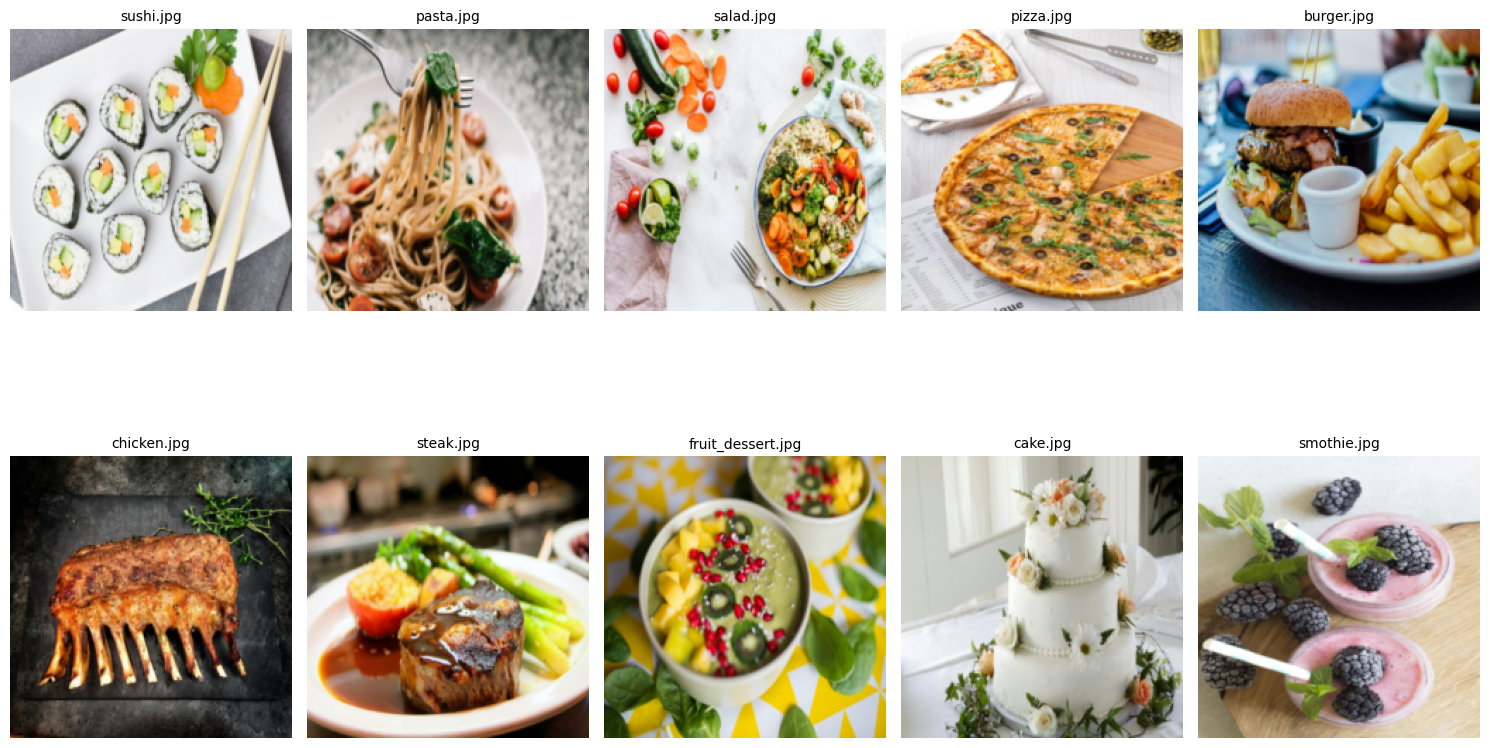

In [2]:
# Импортируем необходимые модули
import os                                 # Для работы с файловой системой
from skimage.io import imread             # Для чтения изображений из файлов
from skimage.transform import resize      # Для изменения размера изображений
import matplotlib.pyplot as plt           # Для визуализации изображений

# Путь к папке, содержащей изображения
folder_path = 'images'

# Получаем список всех файлов в папке, заканчивающихся на .jpg или .png (регистр не важен)
image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.jpg', '.png'))]

# Загружаем изображения и приводим каждое к размеру 200x200 пикселей
images = [resize(imread(os.path.join(folder_path, file)), (200, 200)) for file in image_files]

# Настраиваем визуализацию: создаем фигуру определенного размера
plt.figure(figsize=(15, 10))  # Ширина = 15 дюймов, высота = 10 дюймов

# Перебираем все изображения и их соответствующие имена файлов
for i, (img, name) in enumerate(zip(images, image_files)):
    plt.subplot(2, 5, i + 1)       # Добавляем подграфик: 2 строки, 5 столбцов, номер текущего
    plt.imshow(img)               # Показываем изображение
    plt.title(name, fontsize=10)  # Устанавливаем название (имя файла) над изображением
    plt.axis('off')               # Отключаем отображение осей (подписи и рамки)

# Автоматически подгоняем расположение подграфиков, чтобы они не налезали друг на друга
plt.tight_layout()

# Отображаем все изображения
plt.show()


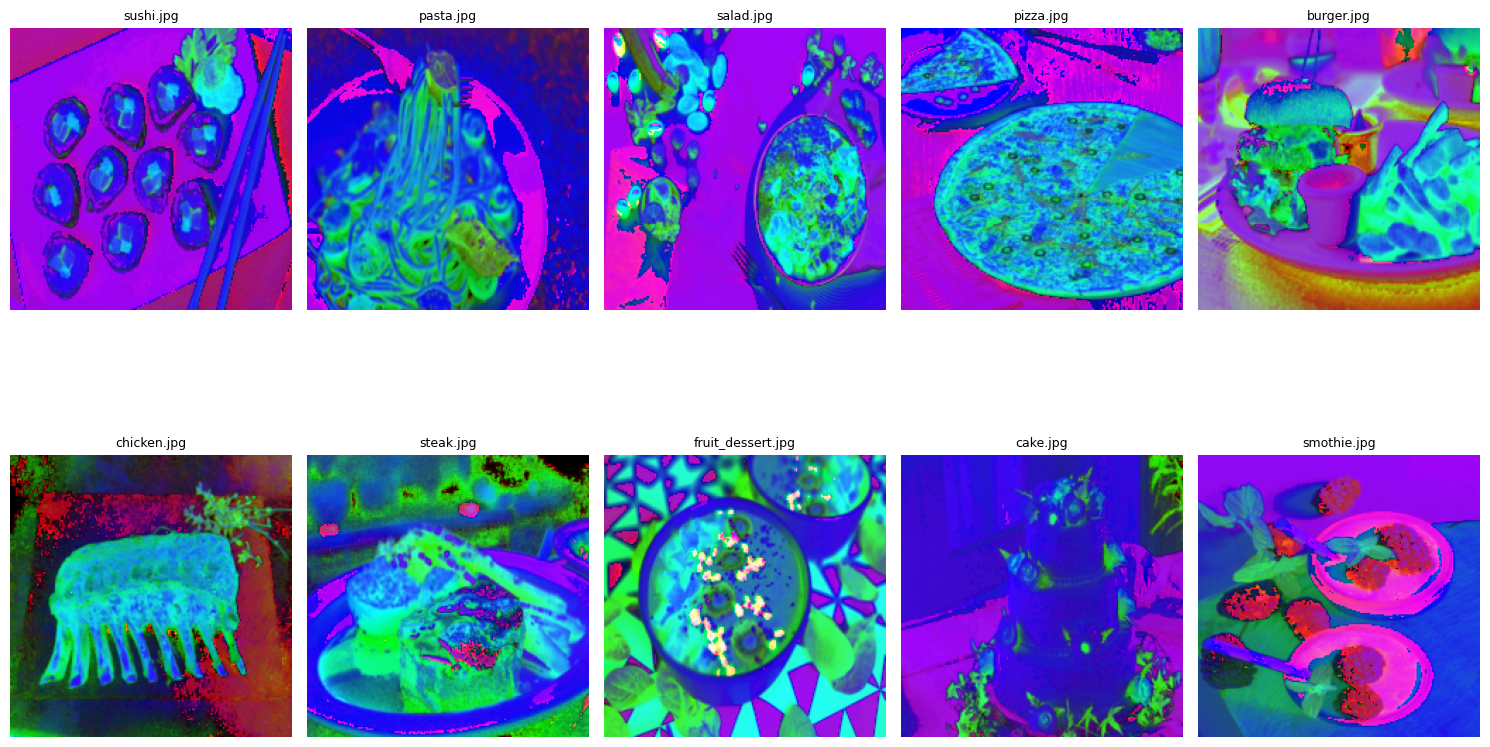

In [3]:
from matplotlib.colors import rgb_to_hsv  # Импорт функции для преобразования RGB → HSV

# Преобразуем все изображения из цветового пространства RGB в HSV
# HSV (оттенок, насыщенность, яркость) может быть полезен для анализа цвета
hsv_images = [rgb_to_hsv(img) for img in images]

# Визуализируем полученные изображения в HSV
plt.figure(figsize=(15, 10))  # Размер общего окна вывода

# Перебираем изображения и соответствующие им имена файлов
for i, (img, name) in enumerate(zip(hsv_images, image_files)):
    plt.subplot(2, 5, i + 1)       # 2 строки, 5 столбцов, текущий номер изображения
    plt.imshow(img)               # Показываем изображение в HSV (в matplotlib выглядит корректно)
    plt.title(name, fontsize=9)   # Отображаем имя файла над изображением
    plt.axis('off')               # Убираем оси (числа и рамки)

# Подгоняем размещение всех подграфиков
plt.tight_layout()

# Отображаем окно с изображениями
plt.show()


In [4]:
def extract_color_features(hsv_image, bins=4):
    """
    Извлекает признаки цвета из изображения в HSV формате.

    Аргументы:
    hsv_image — изображение в цветовом пространстве HSV
    bins — количество интервалов (корзин) для гистограммы каждого канала

    Возвращает:
    Нормализованный вектор признаков (гистограммы H, S, V)
    """
    
    # Строим гистограмму по каждому каналу (H, S, V)
    # Диапазон значений HSV: от 0 до 1, разбиваем на 'bins' корзин
    h = np.histogram(hsv_image[:, :, 0], bins=bins, range=(0, 1))[0]  # Оттенок (Hue)
    s = np.histogram(hsv_image[:, :, 1], bins=bins, range=(0, 1))[0]  # Насыщенность (Saturation)
    v = np.histogram(hsv_image[:, :, 2], bins=bins, range=(0, 1))[0]  # Яркость (Value)

    # Объединяем все три гистограммы в один вектор
    feature_vector = np.concatenate([h, s, v])

    # Нормализуем вектор признаков, чтобы сумма элементов = 1
    return feature_vector / np.sum(feature_vector)

# Применяем функцию к каждому изображению и создаём массив признаков
features = np.array([extract_color_features(img) for img in hsv_images])

# Выводим форму полученного массива: (кол-во изображений, длина вектора признаков)
print("Форма массива признаков:", features.shape)


Форма массива признаков: (10, 12)


In [5]:
from sklearn.cluster import KMeans  # Импортируем алгоритм кластеризации K-средних

# Обучаем модель кластеризации KMeans
num_classes = 3  # Количество кластеров (групп), можно изменить по задаче
kmeans = KMeans(n_clusters=num_classes, random_state=42)  # random_state — для воспроизводимости

# Обучаем модель и предсказываем к какому кластеру относится каждый объект
labels = kmeans.fit_predict(features)

# Выводим предсказанные метки классов для каждого изображения
print("Метки классов:", labels)


Метки классов: [1 2 1 0 1 2 2 2 2 1]


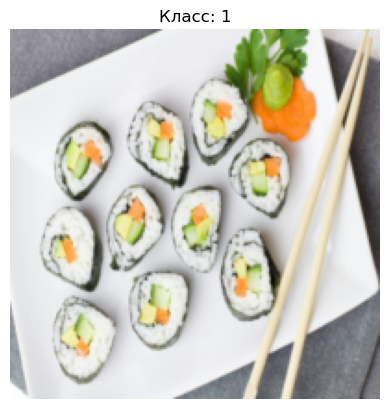

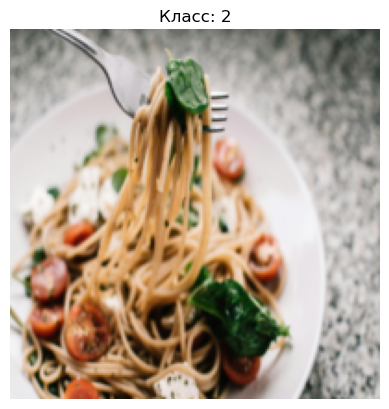

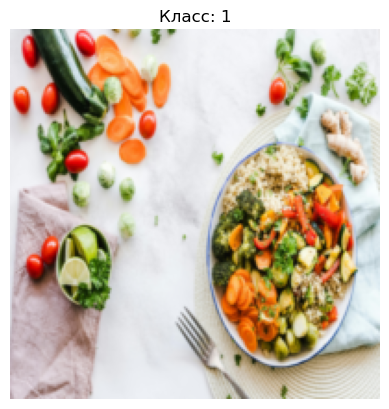

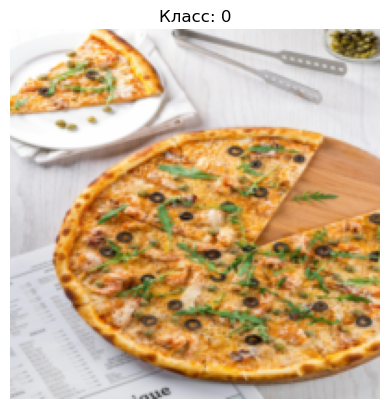

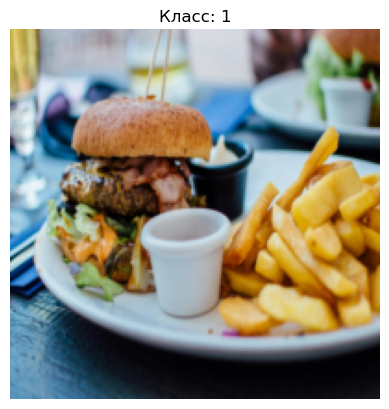

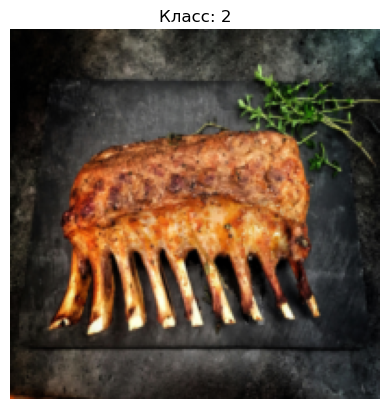

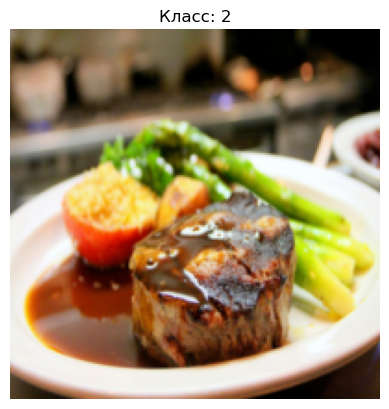

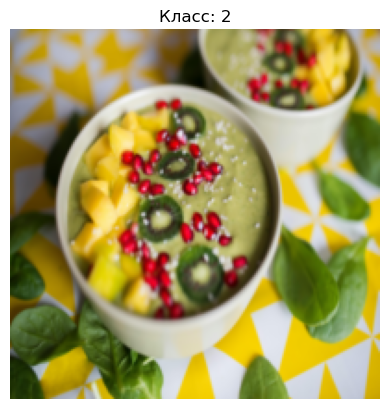

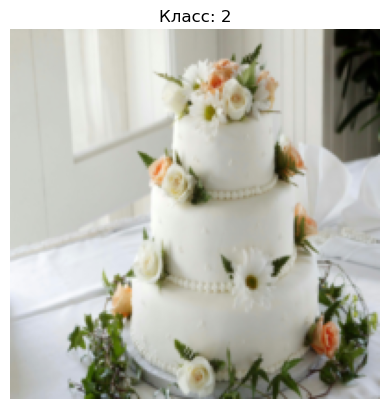

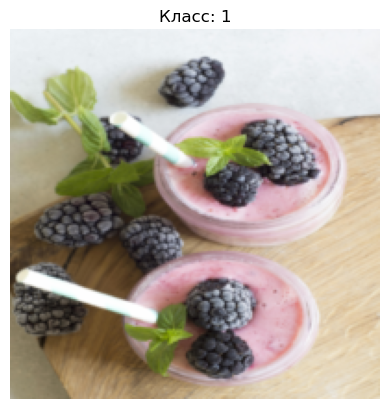

In [6]:
# Задаем цвета для границ изображения в зависимости от кластера
colors = ['red', 'green', 'blue']  # Цвета для кластеров 0, 1 и 2

# Перебираем все изображения
for i, img in enumerate(images):
    plt.imshow(img)                        # Отображаем изображение
    plt.title(f"Класс: {labels[i]}")      # Заголовок с номером кластера
    plt.axis('off')                        # Отключаем оси

    # Настраиваем цвет и толщину границ вокруг изображения
    plt.gca().spines['top'].set_color(colors[labels[i]])
    plt.gca().spines['bottom'].set_color(colors[labels[i]])
    plt.gca().spines['left'].set_color(colors[labels[i]])
    plt.gca().spines['right'].set_color(colors[labels[i]])
    plt.gca().spines['top'].set_linewidth(5)

    # Отображаем текущее изображение
    plt.show()


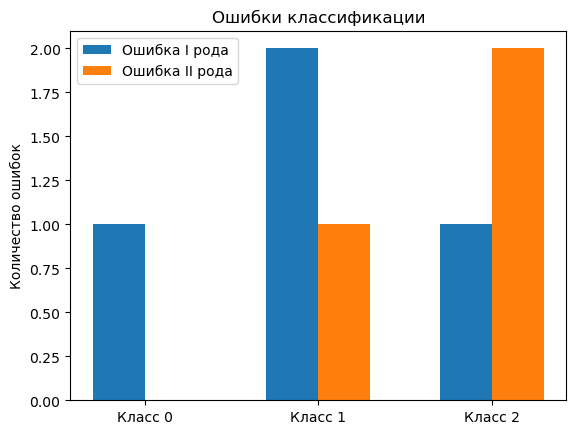

In [7]:
# Значения количества ошибок I и II рода по каждому классу
false_positive = [1, 2, 1]  # Ошибка I рода (ложноположительные)
false_negative = [0, 1, 2]  # Ошибка II рода (ложноотрицательные)

# Названия классов (например, Класс 0, Класс 1, Класс 2)
classes = [f'Класс {i}' for i in range(num_classes)]

# Создаем массив с координатами по оси X для каждого класса
x = np.arange(num_classes)

# Ширина столбца на графике
width = 0.3

# Отрисовываем столбцы: ошибки I рода немного левее позиции x
plt.bar(x - width/2, false_positive, width, label='Ошибка I рода')

# Отрисовываем столбцы: ошибки II рода немного правее позиции x
plt.bar(x + width/2, false_negative, width, label='Ошибка II рода')

# Подписи по оси X
plt.xticks(x, classes)

# Подпись оси Y
plt.ylabel("Количество ошибок")

# Заголовок графика
plt.title("Ошибки классификации")

# Отображаем легенду
plt.legend()

# Показываем итоговый график
plt.show()


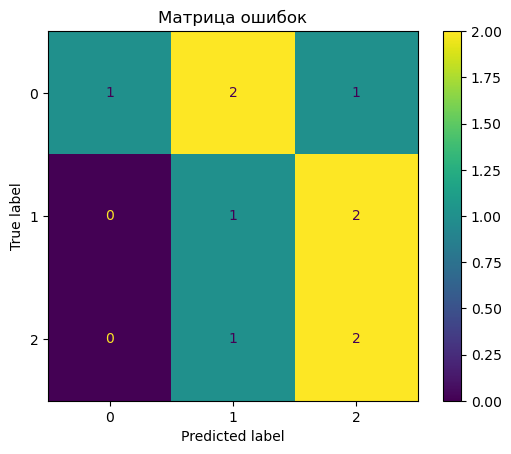

In [8]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay  # Импорт функций для расчета и отображения матрицы ошибок
from sklearn.model_selection import train_test_split  # Импорт функции для разделения данных (в данном коде не используется)

# Для упрощения считаем, что у нас есть 3 класса (0, 1, 2), и мы знаем их правильные метки.
# Если реальных меток нет, создаем "фейковые" (искусственные) метки на основе количества изображений:
# повторяем список [0, 1, 2] столько раз, чтобы покрыть длину features
y_true = np.array([0, 1, 2] * (len(features) // 3 + 1))[:len(features)]

# Предсказанные моделью метки (результаты кластеризации KMeans)
y_pred = labels

# Строим матрицу ошибок (confusion matrix) по истинным и предсказанным меткам
cm = confusion_matrix(y_true, y_pred)

# Создаем объект отображения матрицы ошибок
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

# Отображаем матрицу ошибок как изображение
disp.plot()

# Добавляем заголовок графику
plt.title("Матрица ошибок")

# Показываем результат
plt.show()


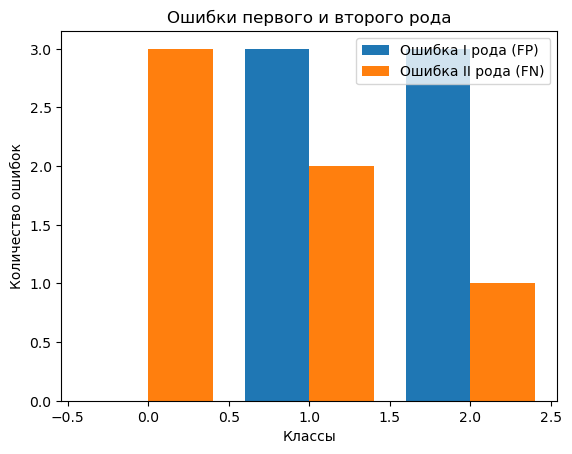

In [9]:
# Ошибки первого рода (False Positive, FP) и второго рода (False Negative, FN)

# False Positive: предсказано положительно, но на самом деле класс другой.
# Считается как: сумма по столбцу - диагональный элемент (истинно предсказанное)
FP = cm.sum(axis=0) - np.diag(cm)

# False Negative: не распознано (пропущено), хотя на самом деле должно быть положительно.
# Считается как: сумма по строке - диагональный элемент
FN = cm.sum(axis=1) - np.diag(cm)

# Генерируем массив индексов классов (например, [0, 1, 2])
x = np.arange(len(FP))

# Строим столбчатую диаграмму: слева — ошибки первого рода, справа — второго рода
plt.bar(x - 0.2, FP, width=0.4, label='Ошибка I рода (FP)')  # Красим ошибки FP левее центра
plt.bar(x + 0.2, FN, width=0.4, label='Ошибка II рода (FN)')  # Красим ошибки FN правее центра

# Подписи осей
plt.xlabel('Классы')
plt.ylabel('Количество ошибок')

# Заголовок графика
plt.title('Ошибки первого и второго рода')

# Отображаем легенду (подписи к цветам)
plt.legend()

# Показываем результат
plt.show()
